In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns
import pandas as pd
pd.set_option("display.max_columns", 200)

import warnings
warnings.filterwarnings('ignore')

## Read datasets from CSV

In [3]:
df = pd.read_csv("ids_data/attack_dataset.csv.gz") # attack dataset
bonafide = pd.read_csv('ids_data/bonafide_dataset_20191121.csv.gz') # bonafide traffic from mawilab
bonafide = pd.concat([bonafide, pd.read_csv('ids_data/bonafide_dataset_20201110.csv.gz')])
bonafide = pd.concat([bonafide, pd.read_csv('ids_data/bonafide_dataset_20201129.csv.gz')])

In [4]:
# add label to bonafide dataset
bonafide['label'] = "bonafide"

## compare both attack and bonafide datasets


In [5]:
# checking if both datasets have same columns count
if df.shape[1]==bonafide.shape[1]:
  print("Both datasets have the same number of columns")

print(df.shape)
print(bonafide.shape)


Both datasets have the same number of columns
(455503, 42)
(380438, 42)


In [6]:
# total number of records including attack and bonafide
total = df.shape[0] + bonafide.shape[0]
print(f"total number of records: {total}")

# total number of attack records
malicious = (df.shape[0]/total)*100
print("total % of attack records: {:0.2f}".format(malicious))

# total number of bonafide records
legitimate = (bonafide.shape[0]/total)*100
print("total % of bonafide records: {:0.2f}".format(legitimate))

total number of records: 835941
total % of attack records: 54.49
total % of bonafide records: 45.51


## bonafide and attack dataset overview

In [7]:
df.head(3)

,frame_info.encap_type,frame_info.time,frame_info.time_epoch,frame_info.number,frame_info.len,frame_info.cap_len,eth.type,ip.version,ip.hdr_len,ip.tos,ip.id,ip.flags,ip.flags.rb,ip.flags.df,ip.flags.mf,ip.frag_offset,ip.ttl,ip.proto,ip.checksum,ip.src,ip.dst,ip.len,ip.dsfield,tcp.srcport,tcp.dstport,tcp.seq,tcp.ack,tcp.len,tcp.hdr_len,tcp.flags,tcp.flags.fin,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,tcp.urgent_pointer,tcp.options.mss_val,label
0,1,"Sep 2, 2020 21:04:37.063530000 -03",1.599091e+09,1,74,74,0x00000800,4,20,NaN,0x00001b58,0x00000000,0,0,0,0,35,6,0x00003e78,179.241.213.24,172.26.8.200,60,0x00000000,1697,5802,0,0,0,40,0x00000002,0,1,0,0,0,0,0,64240,0x0000c9e9,0,1410.0,nmap_null
1,1,"Sep 2, 2020 21:04:39.363792000 -03",1.599091e+09,2,74,74,0x00000800,4,20,NaN,0x000098f1,0x00000000,0,0,0,0,33,6,0x0000c2de,179.241.213.24,172.26.8.200,60,0x00000000,1722,5060,0,0,0,40,0x00000002,0,1,0,0,0,0,0,64240,0x000090cb,0,1410.0,nmap_null
2,1,"Nov 16, 2020 18:15:14.851050000 -03",1.605561e+09,1,54,54,0x00000800,4,20,NaN,0x00007d48,0x00000000,0,0,0,0,37,6,0x0000ff86,34.227.65.60,172.26.8.200,40,0x00000000,44952,443,1,1,0,20,0x00000010,0,0,0,0,1,0,0,1024,0x00005bc3,0,NaN,nmap_window


In [8]:
df.label.value_counts()

label
zmap             74613
nmap_connect     45882
hping_syn        43750
unicorn_syn      43039
nmap_syn         40642
unicorn_conn     39170
masscan          21138
nmap_ack         20497
nmap_window      18851
nmap_null        12511
nmap_xmas        12505
nmap_fin         12504
hping_ack        11344
nmap_maimon      10493
unicorn_ack       8494
hping_xmas        7344
hping_null        7344
hping_fin         7344
unicorn_null      4690
unicorn_xmas      4466
unicorn_fxmas     4444
unicorn_fin       4438
Name: count, dtype: int64

In [9]:
bonafide.head(3)

,frame_info.encap_type,frame_info.time,frame_info.time_epoch,frame_info.number,frame_info.len,frame_info.cap_len,eth.type,ip.version,ip.hdr_len,ip.tos,ip.id,ip.flags,ip.flags.rb,ip.flags.df,ip.flags.mf,ip.frag_offset,ip.ttl,ip.proto,ip.checksum,ip.src,ip.dst,ip.len,ip.dsfield,tcp.srcport,tcp.dstport,tcp.seq,tcp.ack,tcp.len,tcp.hdr_len,tcp.flags,tcp.flags.fin,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,tcp.urgent_pointer,tcp.options.mss_val,label
0,1,"Nov 21, 2019 02:00:00.309420000 -03",1.574312e+09,2,1474,74,0x000086dd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.0,51883.0,1.0,1.0,1400.0,20.0,0x00000010,0.0,0.0,0.0,0.0,1.0,0.0,0.0,131.0,0x0000308f,0.0,NaN,bonafide
1,1,"Nov 21, 2019 02:00:00.313671000 -03",1.574312e+09,7,54,54,0x00000800,4.0,20.0,NaN,0x0000b6f2,0x00000000,0.0,0.0,0.0,0.0,247.0,6.0,0x00003220,89.8.230.210,163.221.247.4,40.0,0x00000000,53026.0,57963.0,0.0,0.0,0.0,20.0,0x00000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1024.0,0x0000efab,0.0,NaN,bonafide
2,1,"Nov 21, 2019 02:00:00.315642000 -03",1.574312e+09,10,70,70,0x00000800,4.0,20.0,NaN,0x0000a2bb,0x00000000,0.0,0.0,0.0,0.0,251.0,1.0,0x000014d3,203.180.192.119,79.231.44.35,56.0,0x00000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bonafide


In [10]:
bonafide.label.value_counts()

label
bonafide    380438
Name: count, dtype: int64

## combine both attack and bonafide datasets

In [11]:
full_data = pd.concat([bonafide, df])

---
## Pre-processing
> converted features from hexadecimal to integer

> imputed null value fields by 0

In [12]:
hex_fields = ['eth.type', 'ip.id', 'ip.flags', 'ip.checksum', 'ip.dsfield', 'tcp.flags', 'tcp.checksum']

full_data = full_data.fillna(0)

for field in hex_fields:
    full_data[field] = full_data[field].apply(lambda x: int(str(x), 16))


In [13]:
print(full_data.shape)

(835941, 42)


### check only packets with tcp protocol ( ip proto 6) exist and filter other packets

In [14]:
non_tcp_records = full_data[full_data['ip.proto'] != 6].shape[0]
print("Removed", non_tcp_records,"non-tcp packets from the original dataset.")

# includes only the packets/records that are tcp-based
full_data = full_data[full_data['ip.proto'] == 6]

Removed 52177 non-tcp packets from the original dataset.


In [15]:
full_data.label.value_counts()

label
bonafide         328261
zmap              74613
nmap_connect      45882
hping_syn         43750
unicorn_syn       43039
nmap_syn          40642
unicorn_conn      39170
masscan           21138
nmap_ack          20497
nmap_window       18851
nmap_null         12511
nmap_xmas         12505
nmap_fin          12504
hping_ack         11344
nmap_maimon       10493
unicorn_ack        8494
hping_xmas         7344
hping_null         7344
hping_fin          7344
unicorn_null       4690
unicorn_xmas       4466
unicorn_fxmas      4444
unicorn_fin        4438
Name: count, dtype: int64

### Features that are irrelavant to my objective

> Removed layer-2 related features as below:
> - frame_info.time
> - frame_info.encap_type
> - frame_info.time_epoch
> - frame_info.number
> - frame_info.len
> - frame_info.cap_len
> - eth.type

> Removed reduntant or constant features as below:
> - ip.version - only IPV4 is taken now
> - ip.proto - only TCP records/packets are taken now
> - ip.src
> - ip.dst
> - ip.flags
> - tcp.flags

In [16]:
full_data.drop(columns=['frame_info.time', 'frame_info.encap_type', 'frame_info.time_epoch', 'frame_info.number',
                        'frame_info.len', 'frame_info.cap_len', 'eth.type', 'ip.flags', 'ip.src', 'ip.dst',
                        'ip.version', 'ip.proto', 'tcp.flags'], axis=1, inplace=True)

## Exploratory Data Analysis

In [17]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783764 entries, 1 to 455502
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ip.hdr_len           783764 non-null  float64
 1   ip.tos               783764 non-null  float64
 2   ip.id                783764 non-null  int64  
 3   ip.flags.rb          783764 non-null  float64
 4   ip.flags.df          783764 non-null  float64
 5   ip.flags.mf          783764 non-null  float64
 6   ip.frag_offset       783764 non-null  float64
 7   ip.ttl               783764 non-null  float64
 8   ip.checksum          783764 non-null  int64  
 9   ip.len               783764 non-null  float64
 10  ip.dsfield           783764 non-null  int64  
 11  tcp.srcport          783764 non-null  float64
 12  tcp.dstport          783764 non-null  float64
 13  tcp.seq              783764 non-null  float64
 14  tcp.ack              783764 non-null  float64
 15  tcp.len              7

In [18]:
full_data.describe()

,ip.hdr_len,ip.tos,ip.id,ip.flags.rb,ip.flags.df,ip.flags.mf,ip.frag_offset,ip.ttl,ip.checksum,ip.len,ip.dsfield,tcp.srcport,tcp.dstport,tcp.seq,tcp.ack,tcp.len,tcp.hdr_len,tcp.flags.fin,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,tcp.urgent_pointer,tcp.options.mss_val
count,783764.0,783764.0,783764.000000,783764.0,783764.000000,783764.000000,783764.0,783764.000000,783764.000000,783764.000000,783764.00000,783764.000000,783764.000000,7.837640e+05,7.837640e+05,783764.000000,783764.000000,783764.000000,783764.000000,783764.000000,783764.000000,783764.000000,783764.000000,783764.000000,7.837640e+05,783764.000000,783764.000000,783764.000000
mean,20.0,0.0,30203.740695,0.0,0.645392,0.000003,0.0,79.569486,32781.104567,180.276429,3.13223,37586.192331,10915.703462,8.771130e+06,2.909447e+07,130.525147,29.747587,0.082888,0.552572,0.052349,0.065710,0.368189,0.014041,0.005017,3.169473e+04,32746.173250,0.543726,557.716057
std,0.0,0.0,20375.832825,0.0,0.478395,0.001597,0.0,78.305417,18708.633422,411.303561,9.68393,20682.776858,18710.648524,1.011235e+08,2.150445e+08,411.599412,9.062705,0.275714,0.497229,0.222729,0.247774,0.482313,0.117661,0.070652,7.277133e+04,18994.536957,158.847216,703.034904
min,20.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,40.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,20.0,0.0,11779.000000,0.0,0.000000,0.000000,0.0,34.000000,17178.000000,40.000000,0.00000,19750.000000,80.000000,0.000000e+00,0.000000e+00,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.024000e+03,16309.000000,0.000000,0.000000
50%,20.0,0.0,29827.000000,0.0,1.000000,0.000000,0.0,41.000000,32137.000000,52.000000,0.00000,43990.000000,892.000000,0.000000e+00,0.000000e+00,0.000000,32.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.638400e+04,32605.500000,0.000000,0.000000
75%,20.0,0.0,48693.000000,0.0,1.000000,0.000000,0.0,61.000000,49056.000000,60.000000,0.00000,53704.000000,9101.000000,1.000000e+00,1.000000e+00,0.000000,40.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.424000e+04,49283.000000,0.000000,1440.000000
max,20.0,0.0,65535.000000,0.0,1.000000,1.000000,0.0,254.000000,65534.000000,8289.000000,224.00000,65534.000000,65535.000000,4.294967e+09,4.294967e+09,8237.000000,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.677696e+07,65534.000000,64447.000000,9176.000000


### Removed columns with zero variance as they dont support learning

In [19]:
full_data.drop(columns=['label']).var() == 0


ip.hdr_len              True
ip.tos                  True
ip.id                  False
ip.flags.rb             True
ip.flags.df            False
ip.flags.mf            False
ip.frag_offset          True
ip.ttl                 False
ip.checksum            False
ip.len                 False
ip.dsfield             False
tcp.srcport            False
tcp.dstport            False
tcp.seq                False
tcp.ack                False
tcp.len                False
tcp.hdr_len            False
tcp.flags.fin          False
tcp.flags.syn          False
tcp.flags.reset        False
tcp.flags.push         False
tcp.flags.ack          False
tcp.flags.urg          False
tcp.flags.cwr          False
tcp.window_size        False
tcp.checksum           False
tcp.urgent_pointer     False
tcp.options.mss_val    False
dtype: bool

In [20]:
full_data.drop(columns=['ip.hdr_len', 'ip.tos', 'ip.flags.rb',
                         'ip.frag_offset', 'ip.flags.mf'], axis=1, inplace=True)

### Linear Correlation greater than 0

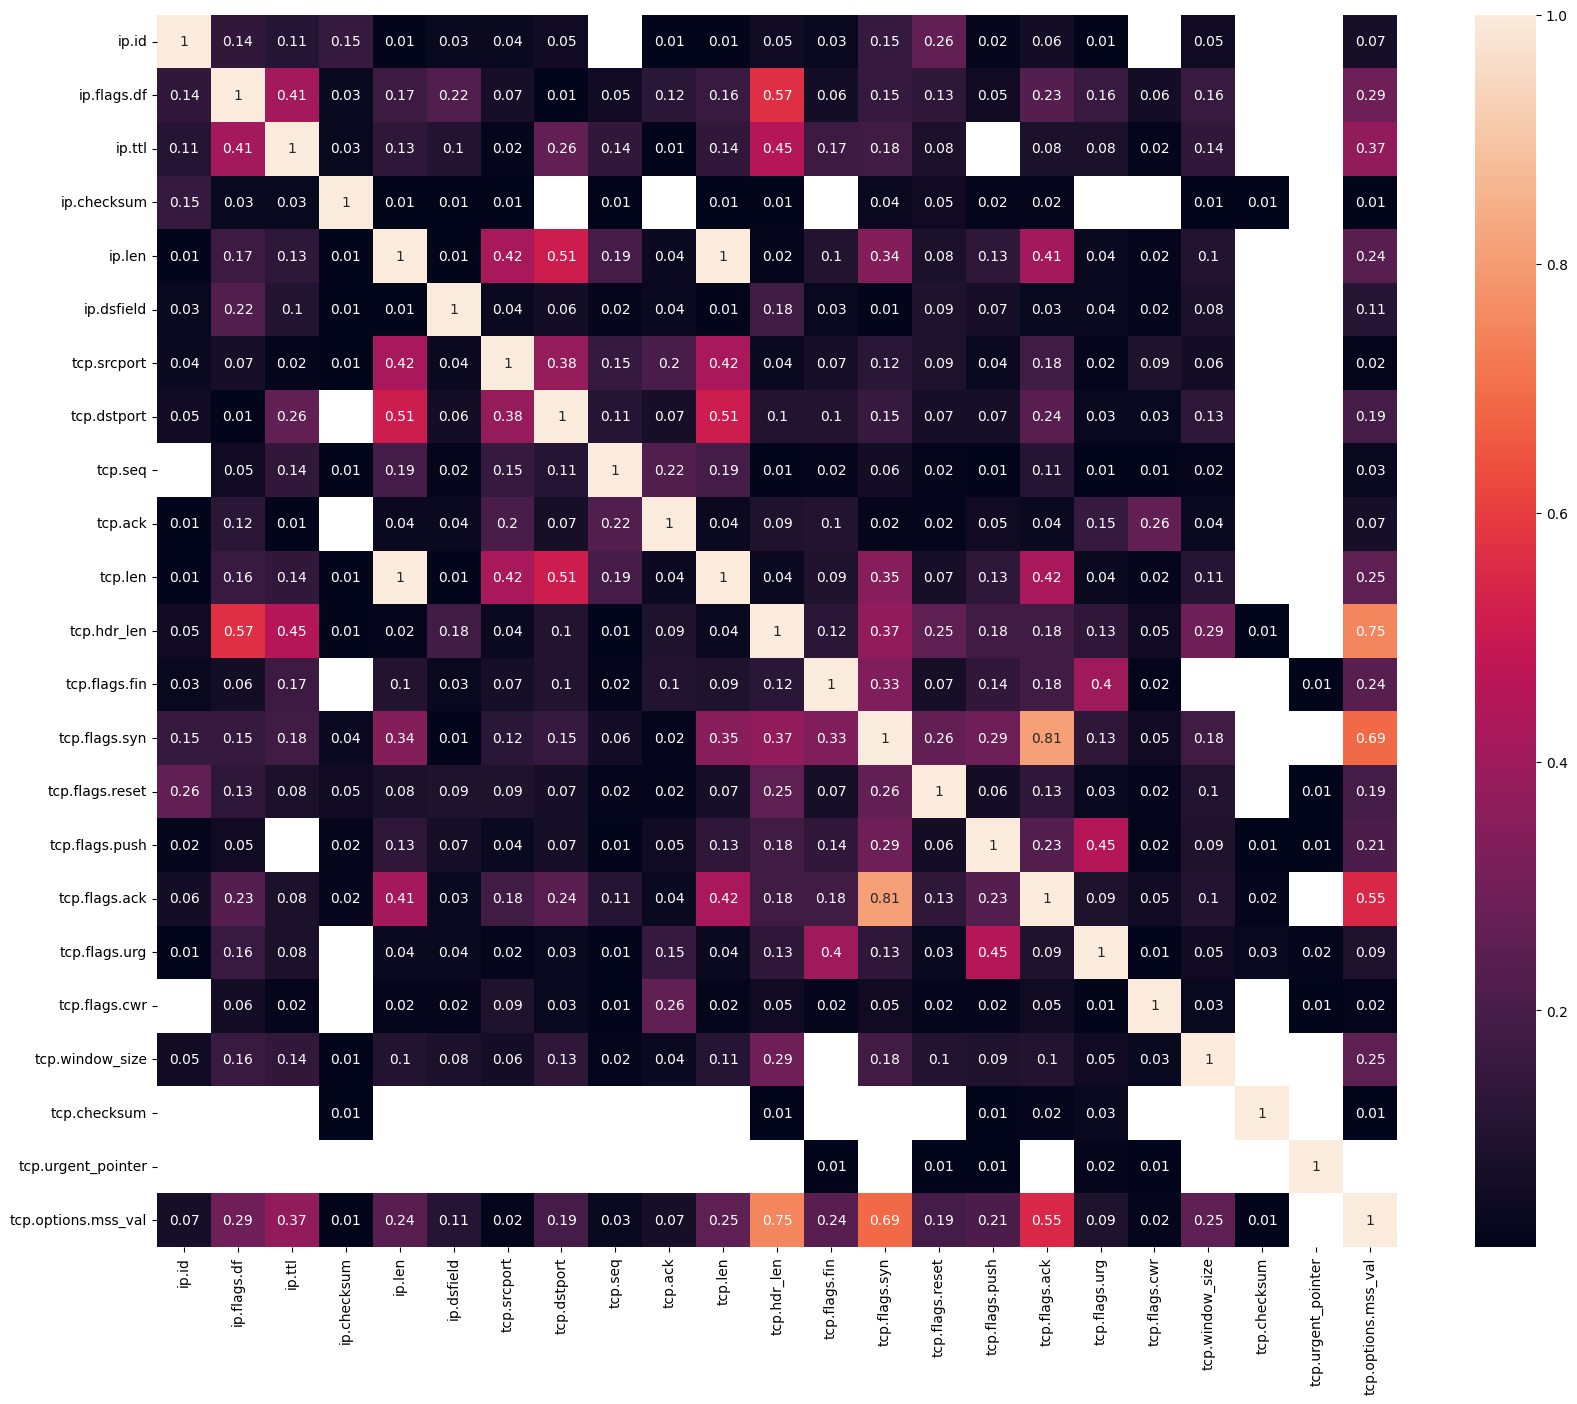

In [21]:
corr_data = full_data.drop(columns=['label']).corr().abs().round(2)

# get only the features with positive correlation
corr_data = corr_data[corr_data>0]

plt.figure(figsize = (20,16))
sns.heatmap(corr_data, xticklabels=corr_data.columns, yticklabels=corr_data.columns, annot=True);

---
## binary classification (attack or bonafide)

In [22]:
full_data['label'].value_counts()

label
bonafide         328261
zmap              74613
nmap_connect      45882
hping_syn         43750
unicorn_syn       43039
nmap_syn          40642
unicorn_conn      39170
masscan           21138
nmap_ack          20497
nmap_window       18851
nmap_null         12511
nmap_xmas         12505
nmap_fin          12504
hping_ack         11344
nmap_maimon       10493
unicorn_ack        8494
hping_xmas         7344
hping_null         7344
hping_fin          7344
unicorn_null       4690
unicorn_xmas       4466
unicorn_fxmas      4444
unicorn_fin        4438
Name: count, dtype: int64

### label encode the label column
> replace bonafide labels as 0

> replace attack lables as 1

In [23]:
full_data.label[full_data.label == "bonafide"] = 0
full_data.label[full_data.label != 0] = 1
full_data['label'].value_counts()

label
1    455503
0    328261
Name: count, dtype: int64

In [24]:
full_data.shape

(783764, 24)

### Removal of some columns either random or might hinder learning
>
> - acknowledgement and cheksums are random
> - it is known tcp.dstport promotes learning the lab architecture where dataset was collected which is UNINTENDED

In [25]:
full_data.drop(columns=["ip.checksum", "tcp.checksum",
                        "tcp.ack", "tcp.dstport"], axis=1, inplace=True)


In [26]:
full_data.head(5)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783764 entries, 1 to 455502
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ip.id                783764 non-null  int64  
 1   ip.flags.df          783764 non-null  float64
 2   ip.ttl               783764 non-null  float64
 3   ip.len               783764 non-null  float64
 4   ip.dsfield           783764 non-null  int64  
 5   tcp.srcport          783764 non-null  float64
 6   tcp.seq              783764 non-null  float64
 7   tcp.len              783764 non-null  float64
 8   tcp.hdr_len          783764 non-null  float64
 9   tcp.flags.fin        783764 non-null  float64
 10  tcp.flags.syn        783764 non-null  float64
 11  tcp.flags.reset      783764 non-null  float64
 12  tcp.flags.push       783764 non-null  float64
 13  tcp.flags.ack        783764 non-null  float64
 14  tcp.flags.urg        783764 non-null  float64
 15  tcp.flags.cwr        7

---
### Drop duplicates records

In [27]:
full_data.drop_duplicates(inplace=True, ignore_index=True)

In [28]:
full_data['label'].value_counts()

label
1    362150
0    315729
Name: count, dtype: int64

======


# save preprocessed dataset into CSV file

In [29]:
full_data.to_csv("full_data_preproces_main.csv", index=False)

# preparation of dataset

In [30]:
full_data = full_data.fillna(0)
X = full_data.drop(columns = ["label"])
y = full_data.label

print(X.shape, y.shape)

(677879, 19) (677879,)


In [31]:
X = X.astype(int)
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677879 entries, 0 to 677878
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   ip.id                677879 non-null  int64
 1   ip.flags.df          677879 non-null  int64
 2   ip.ttl               677879 non-null  int64
 3   ip.len               677879 non-null  int64
 4   ip.dsfield           677879 non-null  int64
 5   tcp.srcport          677879 non-null  int64
 6   tcp.seq              677879 non-null  int64
 7   tcp.len              677879 non-null  int64
 8   tcp.hdr_len          677879 non-null  int64
 9   tcp.flags.fin        677879 non-null  int64
 10  tcp.flags.syn        677879 non-null  int64
 11  tcp.flags.reset      677879 non-null  int64
 12  tcp.flags.push       677879 non-null  int64
 13  tcp.flags.ack        677879 non-null  int64
 14  tcp.flags.urg        677879 non-null  int64
 15  tcp.flags.cwr        677879 non-null  int64
 16  tc

# Grid Search for Machine Learning Algorithms

## ML model generation

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import CalibratedClassifierCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, accuracy_score, roc_curve

algorithms = {
    "SVM" : (LinearSVC(random_state=17), {}),
    "KNN" : (KNeighborsClassifier(n_jobs=-1), {
        "n_neighbors" : [1, 3, 5]
    }),
     "MLP" : (MLPClassifier(random_state=17), {
        "hidden_layer_sizes" : (10, 10),
    }),
    "NB" : (GaussianNB(), {}),
    "XGB" : (XGBClassifier(random_state=17, n_jobs=-1), {}),
    "LR" : (LogisticRegression(random_state=17, n_jobs=-1), {}),

    "RF" : (RandomForestClassifier(random_state=17, n_jobs=-1), {
        "n_estimators" : [10, 15, 20],
        "criterion" : ("gini", "entropy"),
        "max_depth": [5, 10],
        "class_weight": (None, "balanced", "balanced_subsample")
    }),
    "DT" : (DecisionTreeClassifier(random_state=17), {
        "criterion": ("gini", "entropy"),
        "max_depth": [5, 10, 15],
        "class_weight": (None, "balanced")
    }),
}



## Best parameters estimation by f1-score 

In [35]:
# Train, Test
k_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=17)
# Validation
grid_search_k_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
# Performance metric
# f1-score; it can be considered roc_auc score for binary classification (attack or bonafide)

performance_scores = {}
best_parameters = {}
# placeholder for algos and their scores
for algo in algorithms.keys():
    performance_scores[algo] = { 'actual': [], 'predicted': [] }


for algo, (model, def_params) in algorithms.items():
  print(algo)
  # inner loop runs k times eql to num of folds
  for train_fold, test_fold in k_fold_cv.split(X, y):
    # scale the train fold set
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X.iloc[train_fold])
    y_train = y.iloc[train_fold]

    # fit the parameter estimator
    estimator = GridSearchCV(model, def_params, cv=grid_search_k_fold, scoring=make_scorer(f1_score), n_jobs=-1)
    estimator.fit(X_train, y_train)
    # save the best hyperparameters
    best_parameters[algo] = estimator.best_params_

    # scale the test fold set
    X_test = scaler.transform(X.iloc[test_fold])
    y_test = y.iloc[test_fold]

    # predict by the best candidate model
    y_pred = estimator.predict(X_test)

    # saving the y_test and y_pred for later evaluation   
    # FOR ALL TEST FOLDS COMBINED
    performance_scores[algo]['actual'].extend(y_test)
    performance_scores[algo]['predicted'].extend(y_pred)


SVM
KNN
MLP
NB
XGB
LR
RF
DT


## Grid search results of best model hyperparameters by f1-score

In [37]:
best_parameters

{'SVM': {},
 'KNN': {'n_neighbors': 1},
 'MLP': {'hidden_layer_sizes': 10},
 'NB': {},
 'XGB': {},
 'LR': {},
 'RF': {'class_weight': 'balanced_subsample',
  'criterion': 'gini',
  'max_depth': 10,
  'n_estimators': 20},
 'DT': {'class_weight': None, 'criterion': 'entropy', 'max_depth': 15}}

# ROC_AUC evaluation for best hyperparameter selection

## best set of parameter estimation by roc_auc

In [38]:

algorithms2 = {
    "SVM" : (CalibratedClassifierCV(LinearSVC(random_state=17), n_jobs=-1), {}), 
    "MLP" : (MLPClassifier(random_state=17), {
        "hidden_layer_sizes" : (10, 10),
    }),
    "KNN" : (KNeighborsClassifier(n_jobs=-1), {
        "n_neighbors" : [1, 3, 5]
    }),
    "XGB" : (XGBClassifier(random_state=17, n_jobs=-1), {}),
    "NB" : (GaussianNB(), {}),
    "LR" : (LogisticRegression(random_state=17, n_jobs=-1), {}),
    "RF" : (RandomForestClassifier(random_state=17, n_jobs=-1), {
        "n_estimators" : [10, 15, 20],
        "criterion" : ("gini", "entropy"), 
        "max_depth": [5, 10],
        "class_weight": (None, "balanced", "balanced_subsample")
    }),
    "DT" : (DecisionTreeClassifier(random_state=17), {
        "criterion": ("gini", "entropy"), 
        "max_depth": [5, 10, 15],
        "class_weight": (None, "balanced")
    }),
}

In [39]:
# Train, Test
k_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=17)
# Validation
grid_search_k_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)
# Performance metric
# roc_auc_score

performance_scores2 = {}
best_parameters2 = {}
for algo in algorithms2.keys():
    performance_scores2[algo] = {'actual': [], 'predicted': []}


for algo, (model, def_params) in algorithms2.items():
  print(algo)
  # inner loop runs k times eql to num of folds
  for train_fold, test_fold in k_fold_cv.split(X, y):
      
    # scale the train fold set
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X.iloc[train_fold])
    y_train = y.iloc[train_fold]

    # fit the parameter estimator
    estimator = GridSearchCV(model, def_params, cv=grid_search_k_fold, scoring=make_scorer(roc_auc_score), n_jobs=-1)
    estimator.fit(X_train, y_train)
      
    # save the best hyperparameters
    best_parameters2[algo] = estimator.best_params_

    # scale the test fold set
    X_test = scaler.transform(X.iloc[test_fold])
    y_test = y.iloc[test_fold]
    
    # predict by the best candidate model
    y_pred = estimator.predict_proba(X_test).transpose()[1]
      
    # saving y_test and y_pred for later evaluation
    performance_scores2[algo]['actual'].extend(y_test)
    performance_scores2[algo]['predicted'].extend(y_pred)

SVM
MLP
KNN
XGB
NB
LR
RF
DT


In [41]:
best_parameters2

{'SVM': {},
 'MLP': {'hidden_layer_sizes': 10},
 'KNN': {'n_neighbors': 1},
 'XGB': {},
 'NB': {},
 'LR': {},
 'RF': {'class_weight': 'balanced_subsample',
  'criterion': 'gini',
  'max_depth': 10,
  'n_estimators': 20},
 'DT': {'class_weight': None, 'criterion': 'entropy', 'max_depth': 15}}

# Evaluation metric scores of the best candidate model for each Algorithm on all TEST FOLDs combined

## classification metrics scores for best set of parameters (candidate model) on ALL TEST FOLDs combined

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = [accuracy_score, precision_score, recall_score, f1_score,roc_auc_score]
score_names = ['Accuracy', 'Precision', "Recall", 'F1', 'ROC']
scores = {}
for name in score_names:
    scores[name] = {}

# calculate the metrics scores
for i in range(len(metrics)):
    temp = {}
    for algo in algorithms.keys():
        if metrics[i] is metrics[-1]: # include the roc scores
            temp.update({algo:metrics[i](performance_scores2[algo]['actual'], performance_scores2[algo]['predicted'])})
        else: # include rest of the scores
            temp.update({algo:metrics[i](performance_scores[algo]['actual'], performance_scores[algo]['predicted'])})
    scores[score_names[i]] = dict(sorted(temp.items(), key=lambda item: item[1], reverse=True)) # sort algo:score dict
    del temp # release memory


In [254]:
for key, value in scores.items():
    print(key)
    for k, v in value.items():
        print(k, v)
    print("\n")

Accuracy
DT 0.9999365668504261
XGB 0.9998731337008522
KNN 0.9991591419707647
RF 0.9989363883524935
MLP 0.9987696919361715
LR 0.9084556388381997
SVM 0.9016668166442684
NB 0.6913977273230179


Precision
DT 0.9998950806636424
XGB 0.9997984594572209
RF 0.9996074235650917
KNN 0.9989072003355668
MLP 0.9987135884808198
LR 0.8835125906084182
SVM 0.8668393113414143
NB 0.6338608243001745


Recall
DT 0.9999861935662019
NB 0.9999668645588844
XGB 0.9999641032721248
KNN 0.9995195361038244
MLP 0.9989838464724562
RF 0.9984012149661743
SVM 0.9640287173823001
LR 0.9544912329145382


F1
DT 0.9999406350394087
XGB 0.9998812745043901
KNN 0.9992132744071264
RF 0.9990039551683122
MLP 0.998848699195746
LR 0.9176314119836367
SVM 0.9128544235616496
NB 0.7758955554055776


ROC
XGB 0.9999988265040711
RF 0.9999860555451553
DT 0.9999408173859827
MLP 0.9999251679210259
KNN 0.9991326479584143
LR 0.9696534960046947
SVM 0.9617430380478496
NB 0.924145986912221




In [226]:
for i in range(len(score_names)):
    
    print(score_names[i])
    score_df = pd.DataFrame(data=scores[score_names[i]], columns=scores[score_names[i]].keys(), index=[score_names[i]])
    score_df.to_csv(f"scores/{score_names[i]}_scores.csv", index=True)


Accuracy
Precision
Recall
F1
ROC


In [216]:
score_df

,XGB,RF,DT,MLP,KNN,LR,SVM,NB
ROC,0.999999,0.999986,0.999941,0.999925,0.999133,0.969653,0.961743,0.924146


## plotting the ROC/AUC curve

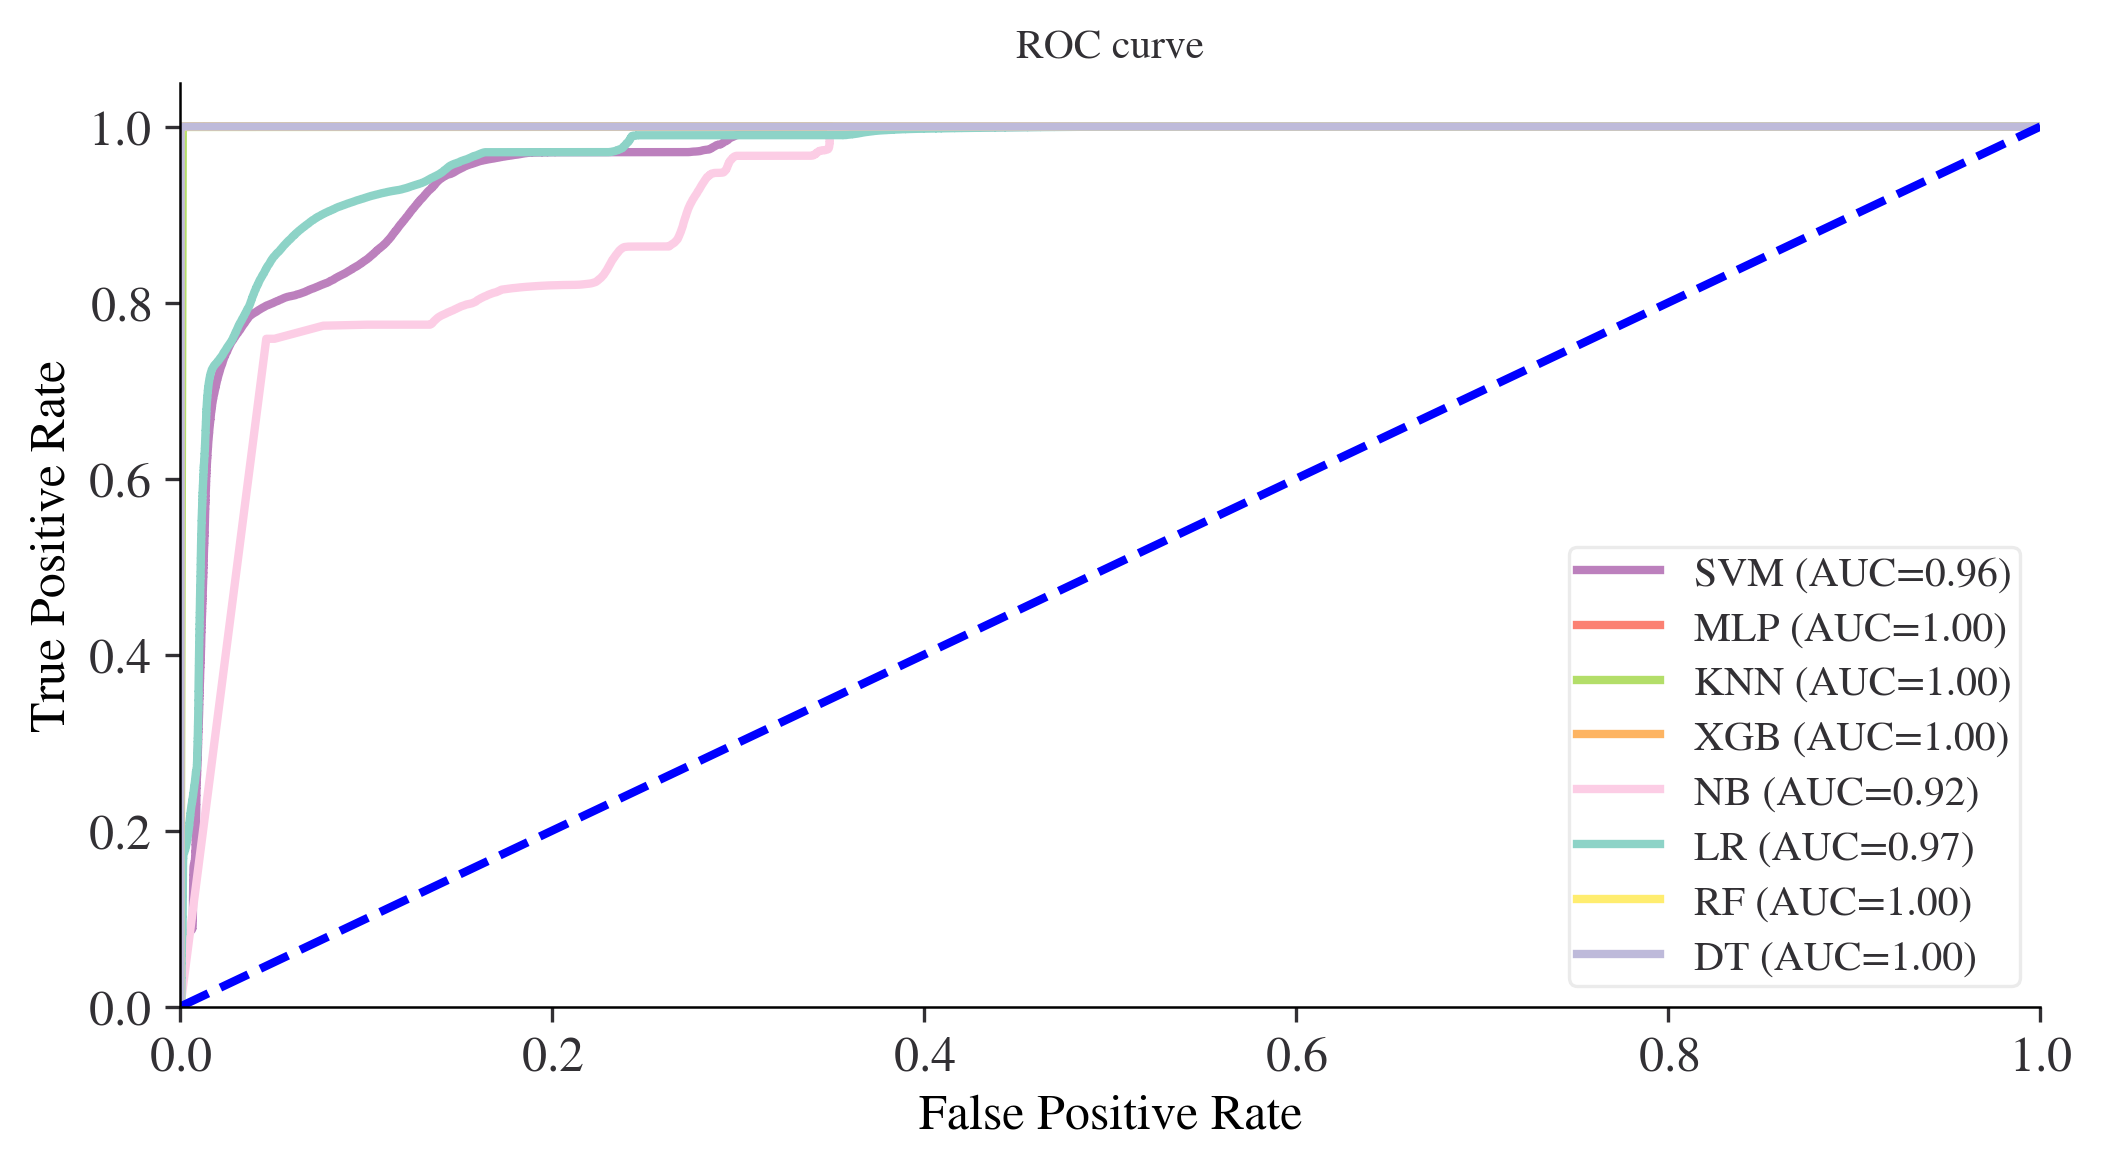

In [265]:
import os
from sklearn.metrics import auc

plt.figure(figsize=(8,4))

for algo, score in performance_scores2.items():
    fpr, tpr, threshold = roc_curve(score['actual'], score['predicted'])
    auc_score = auc(fpr,tpr)
    plt.plot(fpr, tpr, label="{} (AUC={:.2f})".format(algo, auc_score))
    
    
plt.plot([0,1], [0,1], color='blue', linestyle='--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve', fontsize=10, loc='center')
plt.legend(loc="lower right")

plt.savefig('figures/roc_curve_models.jpg', dpi=300, bbox_inches="tight")

# ploting the scores of evaluation metrices

In [236]:
def barplot( classifiers, scores, title, xlabel, ylabel):
    # Create a bar graph
    plt.figure(figsize=(12, 6))  # Set the size of the figure
    bars = plt.bar(classifiers, scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
    
    # Adding title and labels
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.ylim(0, 1)  # Set the y-axis range from 0 to 1
    
    # Adding the data labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        label_pos = yval - yval/10
        plt.text(bar.get_x() + bar.get_width()/2, label_pos, round(yval, 2), va='bottom')  # va: vertical alignment
    
    # Improve layout and show the plot
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    # plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.9)  # Add a grid for y-axis
    plt.savefig('figures/'+ylabel, dpi=300, bbox_inches="tight")
    plt.show()



## accuracy scores of classifiers

In [229]:
accuracy_df = pd.read_csv('scores/Accuracy_scores.csv', index_col=0 )
accuracy_df

,DT,XGB,KNN,RF,MLP,LR,SVM,NB
Accuracy,0.999937,0.999873,0.999159,0.998936,0.99877,0.908456,0.901667,0.691398


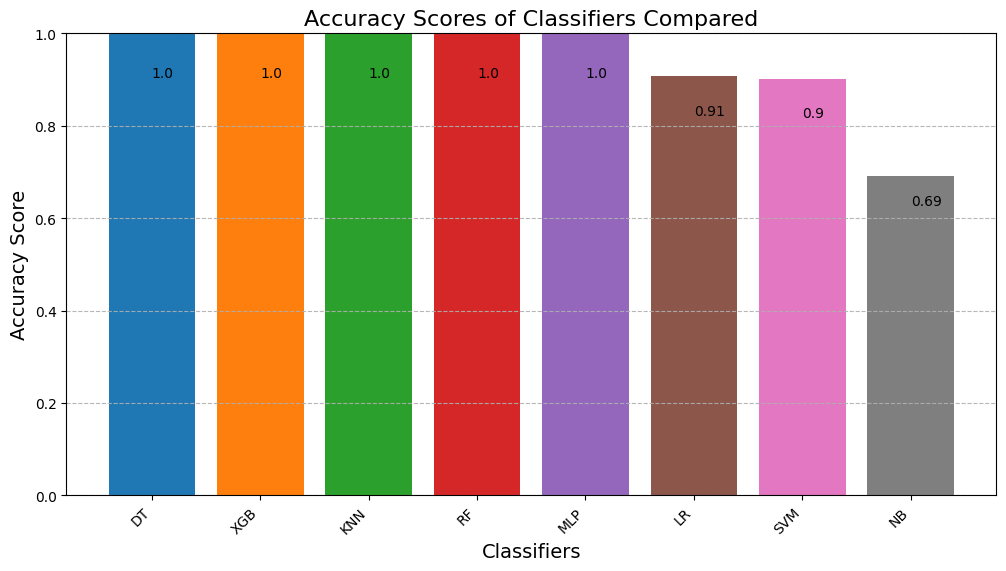

In [245]:
barplot(classifiers=accuracy_df.columns, scores=accuracy_df.iloc[0], title="Accuracy Scores of Classifiers Compared",
        xlabel="Classifiers", ylabel='Accuracy Score')

## precision scores of classifiers

In [230]:
precision_df = pd.read_csv('scores/Precision_scores.csv', index_col=0 )
precision_df

,DT,XGB,RF,KNN,MLP,LR,SVM,NB
Precision,0.999895,0.999798,0.999607,0.998907,0.998714,0.883513,0.866839,0.633861


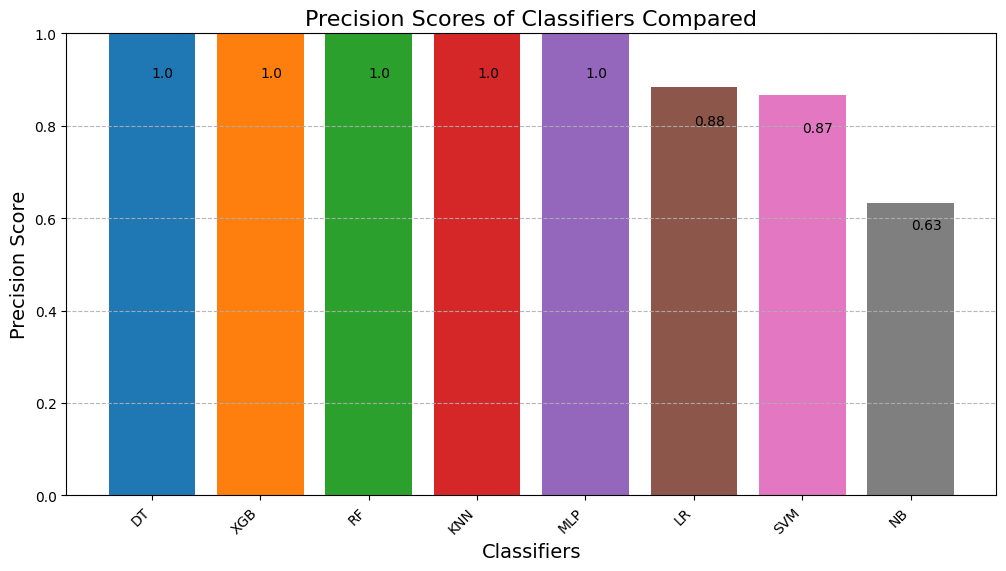

In [246]:
barplot(classifiers=precision_df.columns, scores=precision_df.iloc[0], title="Precision Scores of Classifiers Compared",
        xlabel="Classifiers", ylabel='Precision Score')

## recall scores of classifiers

In [233]:
recall_df = pd.read_csv('scores/Recall_scores.csv', index_col=0 )
recall_df

,DT,NB,XGB,KNN,MLP,RF,SVM,LR
Recall,0.999986,0.999967,0.999964,0.99952,0.998984,0.998401,0.964029,0.954491


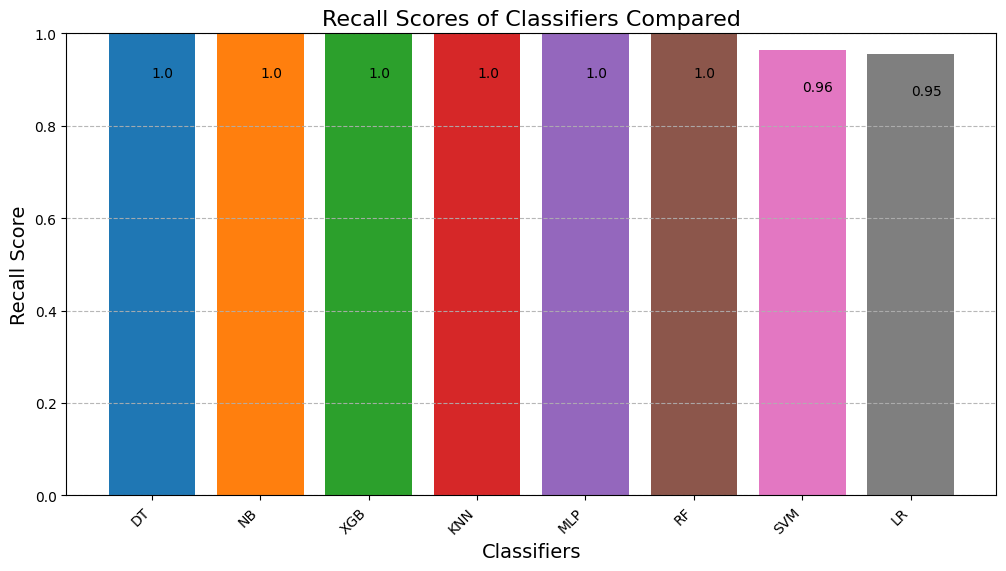

In [247]:
barplot(classifiers=recall_df.columns, scores=recall_df.iloc[0], title="Recall Scores of Classifiers Compared",
        xlabel="Classifiers", ylabel='Recall Score')

## recall scores of classifier

In [234]:
f1_df = pd.read_csv('scores/F1_scores.csv', index_col=0)
f1_df

,DT,XGB,KNN,RF,MLP,LR,SVM,NB
F1,0.999941,0.999881,0.999213,0.999004,0.998849,0.917631,0.912854,0.775896


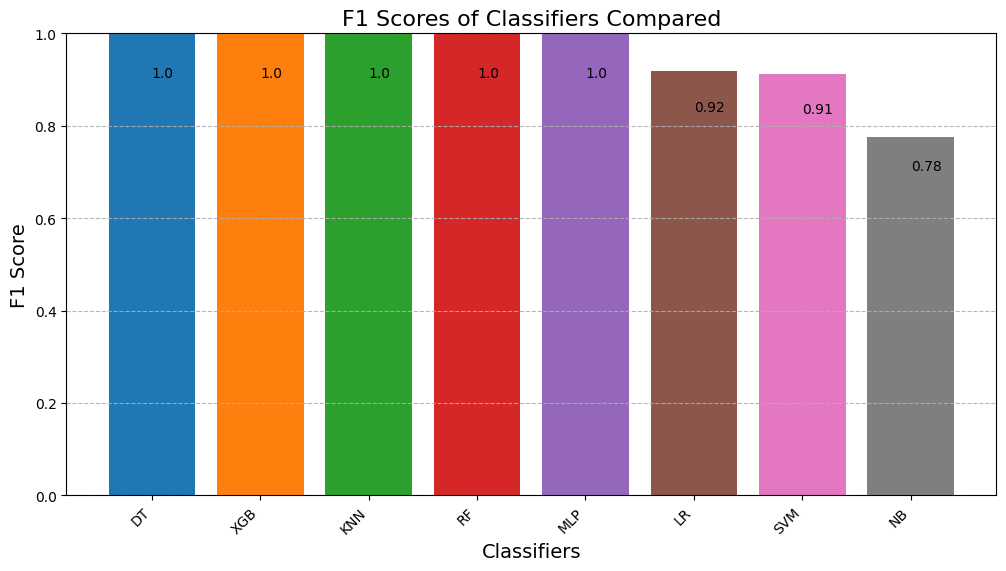

In [248]:
barplot(classifiers=f1_df.columns, scores=f1_df.iloc[0], title="F1 Scores of Classifiers Compared",
        xlabel="Classifiers", ylabel='F1 Score')

## roc scores for classifiers

In [235]:
roc_df = pd.read_csv('scores/ROC_scores.csv', index_col=0)
roc_df

,XGB,RF,DT,MLP,KNN,LR,SVM,NB
ROC,0.999999,0.999986,0.999941,0.999925,0.999133,0.969653,0.961743,0.924146


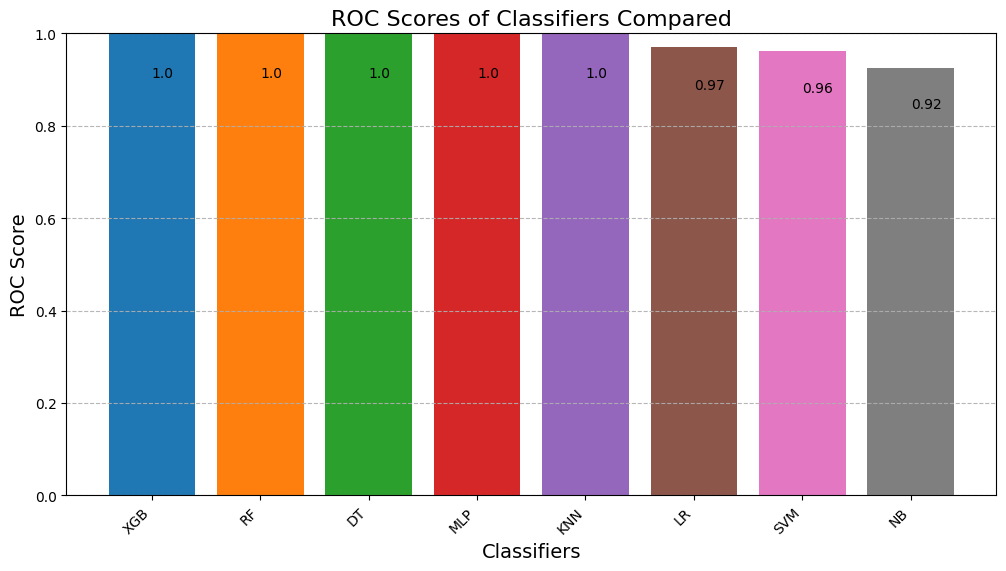

In [249]:
barplot(classifiers=roc_df.columns, scores=roc_df.iloc[0], title="ROC Scores of Classifiers Compared",
        xlabel="Classifiers", ylabel='ROC Score')